# importation des librairies



In [125]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

# installer Tensorflow

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [126]:
## charger les donnees

In [127]:
import warnings
warnings.filterwarnings("ignore")

In [128]:
data = pd.read_csv("Data/DDoS_dataset.csv")

In [129]:
data.head(3)

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0


# 3 Analyse des donnees

In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104345 entries, 0 to 104344
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           104345 non-null  int64  
 1   switch       104345 non-null  int64  
 2   src          104345 non-null  object 
 3   dst          104345 non-null  object 
 4   pktcount     104345 non-null  int64  
 5   bytecount    104345 non-null  int64  
 6   dur          104345 non-null  int64  
 7   dur_nsec     104345 non-null  int64  
 8   tot_dur      104345 non-null  float64
 9   flows        104345 non-null  int64  
 10  packetins    104345 non-null  int64  
 11  pktperflow   104345 non-null  int64  
 12  byteperflow  104345 non-null  int64  
 13  pktrate      104345 non-null  int64  
 14  Pairflow     104345 non-null  int64  
 15  Protocol     104345 non-null  object 
 16  port_no      104345 non-null  int64  
 17  tx_bytes     104345 non-null  int64  
 18  rx_bytes     104345 non-

In [131]:
data["src"].unique()

array(['10.0.0.1', '10.0.0.2', '10.0.0.4', '10.0.0.10', '10.0.0.3',
       '10.0.0.5', '10.0.0.13', '10.0.0.6', '10.0.0.20', '10.0.0.11',
       '10.0.0.12', '10.0.0.18', '10.0.0.8', '10.0.0.7', '10.0.0.9',
       '10.0.0.14', '10.0.0.15', '10.0.0.16', '10.0.0.17'], dtype=object)

In [132]:
data["dst"].unique()

array(['10.0.0.8', '10.0.0.7', '10.0.0.3', '10.0.0.5', '10.0.0.10',
       '10.0.0.13', '10.0.0.1', '10.0.0.11', '10.0.0.2', '10.0.0.4',
       '10.0.0.9', '10.0.0.6', '10.0.0.14', '10.0.0.15', '10.0.0.12',
       '10.0.0.16', '10.0.0.17', '10.0.0.18'], dtype=object)

In [133]:
data["Protocol"].unique()


array(['UDP', 'TCP', 'ICMP'], dtype=object)

In [134]:
data.drop(columns="src", inplace=True, axis=1)
data.drop(columns="dst", inplace=True, axis=1)
data.head(2)

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,126395,134737070,280,734000000,2.810000e+11,2,1943,13531,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0


# 4 pretraitement des donnees

In [135]:
Encoder=LabelEncoder()

In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104345 entries, 0 to 104344
Data columns (total 21 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           104345 non-null  int64  
 1   switch       104345 non-null  int64  
 2   pktcount     104345 non-null  int64  
 3   bytecount    104345 non-null  int64  
 4   dur          104345 non-null  int64  
 5   dur_nsec     104345 non-null  int64  
 6   tot_dur      104345 non-null  float64
 7   flows        104345 non-null  int64  
 8   packetins    104345 non-null  int64  
 9   pktperflow   104345 non-null  int64  
 10  byteperflow  104345 non-null  int64  
 11  pktrate      104345 non-null  int64  
 12  Pairflow     104345 non-null  int64  
 13  Protocol     104345 non-null  object 
 14  port_no      104345 non-null  int64  
 15  tx_bytes     104345 non-null  int64  
 16  rx_bytes     104345 non-null  int64  
 17  tx_kbps      104345 non-null  int64  
 18  rx_kbps      103839 non-

In [137]:
data["Protocol"]= Encoder.fit_transform(data["Protocol"])

In [138]:
data.isnull().sum()

dt               0
switch           0
pktcount         0
bytecount        0
dur              0
dur_nsec         0
tot_dur          0
flows            0
packetins        0
pktperflow       0
byteperflow      0
pktrate          0
Pairflow         0
Protocol         0
port_no          0
tx_bytes         0
rx_bytes         0
tx_kbps          0
rx_kbps        506
tot_kbps       506
label            0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104345 entries, 0 to 104344
Data columns (total 21 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           104345 non-null  int64  
 1   switch       104345 non-null  int64  
 2   pktcount     104345 non-null  int64  
 3   bytecount    104345 non-null  int64  
 4   dur          104345 non-null  int64  
 5   dur_nsec     104345 non-null  int64  
 6   tot_dur      104345 non-null  float64
 7   flows        104345 non-null  int64  
 8   packetins    104345 non-null  int64  
 9   pktperflow   104345 non-null  int64  
 10  byteperflow  104345 non-null  int64  
 11  pktrate      104345 non-null  int64  
 12  Pairflow     104345 non-null  int64  
 13  Protocol     104345 non-null  int64  
 14  port_no      104345 non-null  int64  
 15  tx_bytes     104345 non-null  int64  
 16  rx_bytes     104345 non-null  int64  
 17  tx_kbps      104345 non-null  int64  
 18  rx_kbps      103839 non-

<Axes: >

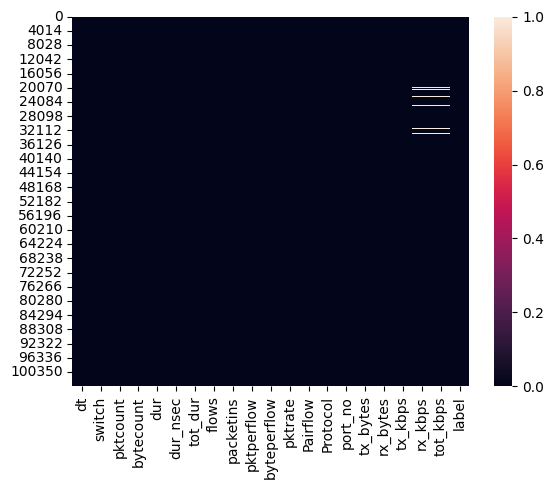

In [139]:
data.info()

sns.heatmap(data.isnull())

In [140]:
data["rx_kbps"].fillna(data["rx_kbps"].mean(),inplace=True)
data["tot_kbps"].fillna(data["tot_kbps"].mean(), inplace=True)

In [141]:
data.isnull().sum()

dt             0
switch         0
pktcount       0
bytecount      0
dur            0
dur_nsec       0
tot_dur        0
flows          0
packetins      0
pktperflow     0
byteperflow    0
pktrate        0
Pairflow       0
Protocol       0
port_no        0
tx_bytes       0
rx_bytes       0
tx_kbps        0
rx_kbps        0
tot_kbps       0
label          0
dtype: int64

# 5 division des donnees

In [142]:
## Normalisation des donnees 

x = data.iloc[ : , :-1]
y = data.iloc[ : , -1]

In [143]:
x

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps
0,11425,1,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,14428310,451,0,2,3,143928631,3917,0,0.0,0.0
1,11605,1,126395,134737070,280,734000000,2.810000e+11,2,1943,13531,14424046,451,0,2,4,3842,3520,0,0.0,0.0
2,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244,451,0,2,1,3795,1242,0,0.0,0.0
3,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244,451,0,2,2,3688,1492,0,0.0,0.0
4,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244,451,0,2,3,3413,3665,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104340,5262,3,79,7742,81,842000000,8.184200e+10,5,10,29,2842,0,0,0,1,15209,12720,1,1.0,2.0
104341,5262,3,79,7742,81,842000000,8.184200e+10,5,10,29,2842,0,0,0,3,15099,14693,1,1.0,2.0
104342,5262,3,31,3038,31,805000000,3.180500e+10,5,10,30,2940,1,0,0,2,3409,3731,0,0.0,0.0
104343,5262,3,31,3038,31,805000000,3.180500e+10,5,10,30,2940,1,0,0,1,15209,12720,1,1.0,2.0


In [144]:
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.23, random_state=40)

In [145]:
print("la valeur de x_train",x_train.shape)
print("la valeur de y_train",y_train.shape)
print("la valeur de x_test",x_test.shape)
print("la valeur de y_test",y_test.shape)



la valeur de x_train (80345, 20)
la valeur de y_train (80345,)
la valeur de x_test (24000, 20)
la valeur de y_test (24000,)


In [146]:
# Normalisation des donnees

scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [147]:
x_train

array([[-0.54480772, -0.11081502,  0.32396264, ..., -0.41171134,
        -0.4897573 , -0.63992425],
       [-1.22028515,  0.91221529,  0.78035159, ..., -0.41171134,
         2.6407063 ,  1.40873691],
       [-0.92932696,  2.9582759 , -1.01279062, ..., -0.41171134,
        -0.4897573 , -0.63992425],
       ...,
       [-0.27581968, -0.11081502,  0.63710809, ...,  1.21983352,
        -0.34337396,  0.71555934],
       [-1.26038274,  0.91221529,  0.88190396, ..., -0.41171134,
         0.74015453,  0.16496375],
       [-0.47463693, -0.11081502,  1.50449925, ..., -0.41171134,
        -0.4897573 , -0.63992425]])

# Étape 6 : Construire le Shallow Neural Network

In [148]:
model= Sequential()

In [151]:
# Ajout de la couche d'entree == couche cachee
model.add( Dense(10, input_shape =(20,), activation ="relu"))

# Ajout de la couche de sortie
model.add(Dense(1,activation="sigmoid"))

In [152]:
# Compiler le modele
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Affichage de l'architecture ou la structure du model
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 331 (1.29 KB)

 Trainable params: 331 (1.29 KB)

 Non-trainable params: 0 (0.00 B)

In [154]:
# Entrainement du modele
history = model.fit(x_train, y_train, epochs=75, verbose=1, validation_data=(x_test, y_test))

Epoch 1/75
2511/2511 ━━━━━━━━━━━━━━━━━━━━ 26s 6ms/step - accuracy: 0.8191 - loss: 0.3633 - val_accuracy: 0.9507 - val_loss: 0.1226
Epoch 2/75
2511/2511 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.9509 - loss: 0.1177 - val_accuracy: 0.9577 - val_loss: 0.1004
Epoch 3/75
2511/2511 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9587 - loss: 0.0955 - val_accuracy: 0.9651 - val_loss: 0.0857
Epoch 4/75
2511/2511 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9662 - loss: 0.0807 - val_accuracy: 0.9717 - val_loss: 0.0706
Epoch 5/75
2511/2511 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9743 - loss: 0.0657 - val_accuracy: 0.9767 - val_loss: 0.0604
Epoch 6/75
2511/2511 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9786 - loss: 0.0570 - val_accuracy: 0.9791 - val_loss: 0.0528
Epoch 7/75
2511/2511 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9819 - loss: 0.0486 - val_accuracy: 0.9824 - val_loss: 0.0474
Epoch 8/75
2511/2511 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 0.9844 - loss: 0

In [ ]:
 7 Visualiser l’évolution de l’entrainement du réseau de neurone


In [156]:
epoch_accuracy = history.history['accuracy']
epoch_loss = history.history['loss']

epoch_val_accuracy = history.history['val_accuracy']
epoch_val_loss = history.history['val_loss']

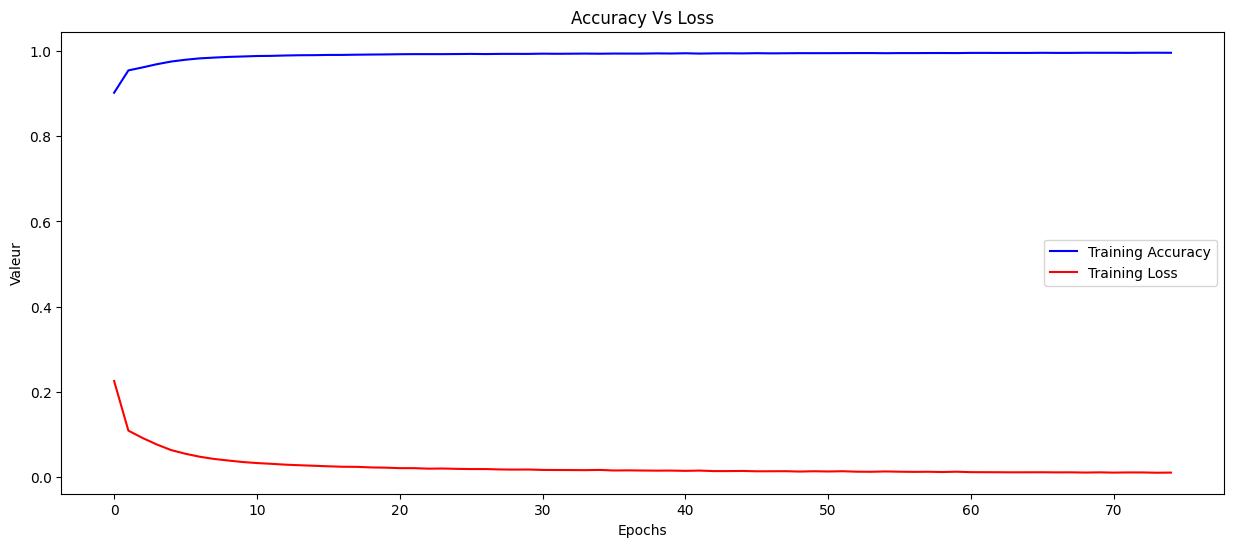

In [157]:
plt.figure(figsize=(15, 6))
plt.plot(range(0, len(epoch_accuracy)), epoch_accuracy, color='blue', label='Training Accuracy')
plt.plot(range(0, len(epoch_loss)), epoch_loss, color='red', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Valeur')
plt.title('Accuracy Vs Loss')
plt.legend()
plt.plot()
plt.show()

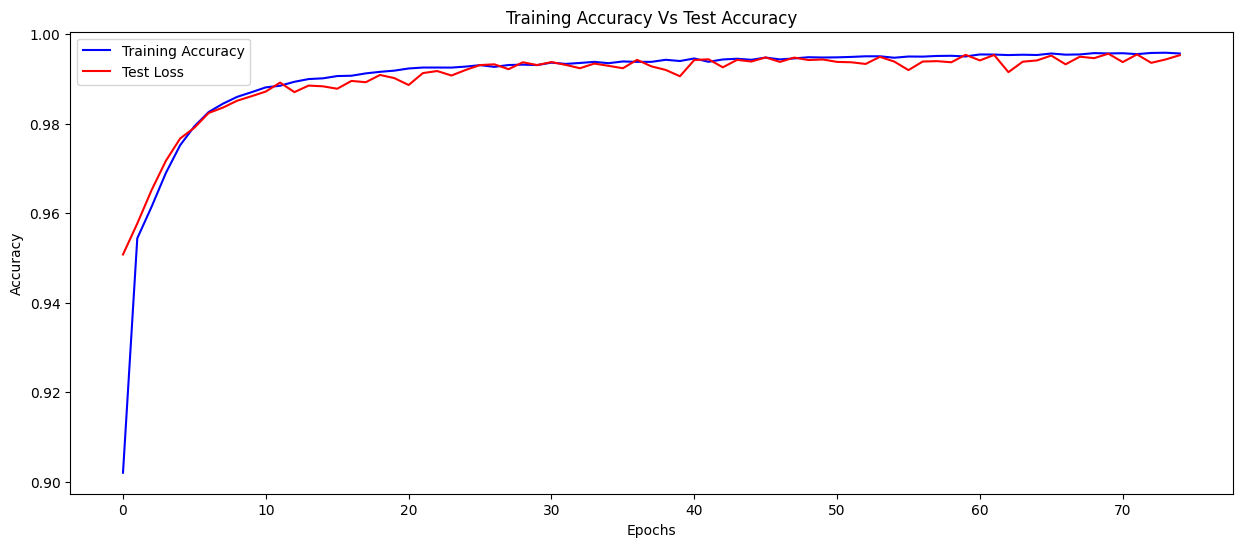

In [158]:
plt.figure(figsize=(15, 6))
plt.plot(range(0, len(epoch_accuracy)), epoch_accuracy, color='blue', label='Training Accuracy')
plt.plot(range(0, len(epoch_val_accuracy)), epoch_val_accuracy, color='red', label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Vs Test Accuracy')
plt.legend()
plt.plot()
plt.show()

In [160]:
# Étape 8 : Evaluer le modèle
model.evaluate(x_test, y_test)

750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9955 - loss: 0.0110


[0.01176693756133318, 0.9952916502952576]